# Data types in R

## Review of summary statistics

In [1]:
# Load datasets.
library(datasets)

# Check head.
head(iris)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa


setosa versicolor  virginica 
        50         50         50

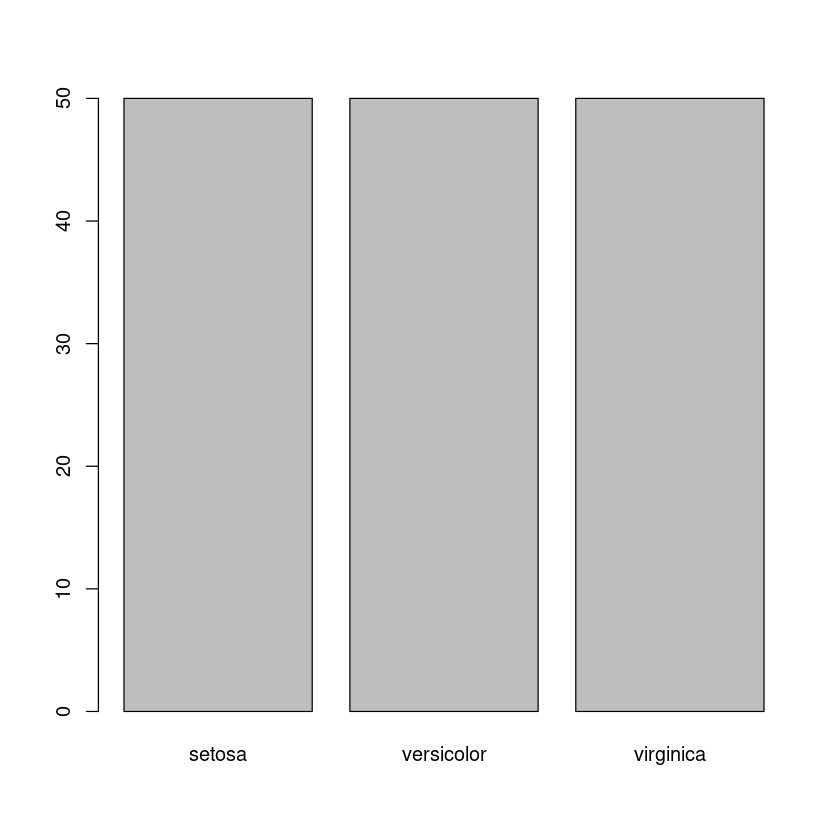

In [2]:
# Categorical variable: summary will provide a count. At this point
# it is interesting to remember what the default plots did...
summary(iris$Species)
plot(iris$Species)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  4.300   5.100   5.800   5.843   6.400   7.900 

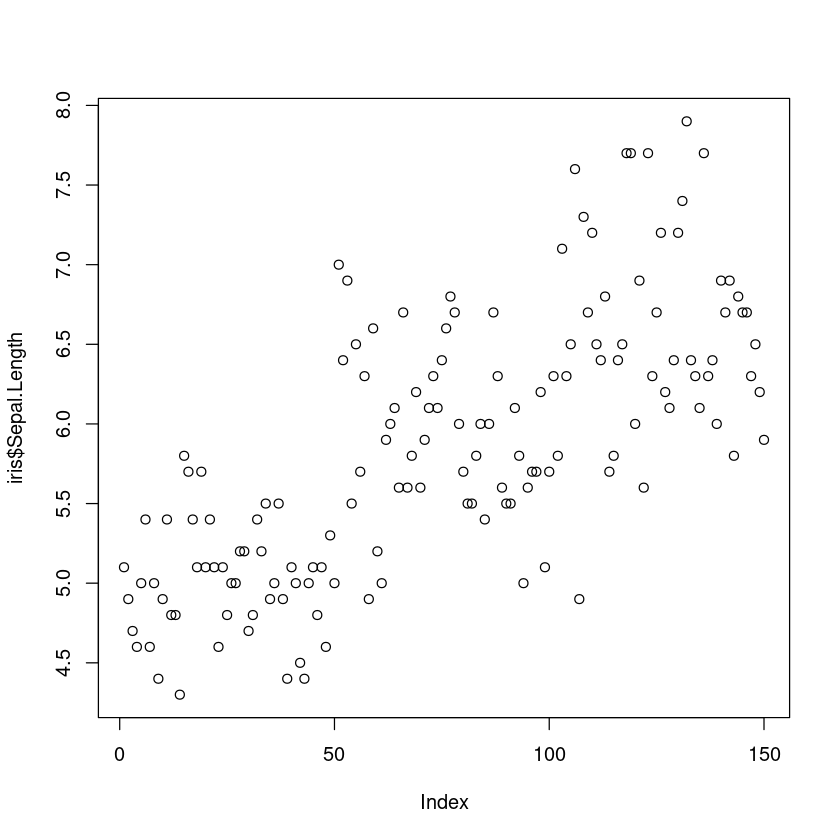

In [3]:
# Quantitative variable: summary statistics are provided. In this
# case it is not exactly what we found in the plots (why?)...
summary(iris$Sepal.Length)
plot(iris$Sepal.Length)

In [4]:
# Entire data frame.
summary(iris)

  Sepal.Length    Sepal.Width     Petal.Length    Petal.Width   
 Min.   :4.300   Min.   :2.000   Min.   :1.000   Min.   :0.100  
 1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.600   1st Qu.:0.300  
 Median :5.800   Median :3.000   Median :4.350   Median :1.300  
 Mean   :5.843   Mean   :3.057   Mean   :3.758   Mean   :1.199  
 3rd Qu.:6.400   3rd Qu.:3.300   3rd Qu.:5.100   3rd Qu.:1.800  
 Max.   :7.900   Max.   :4.400   Max.   :6.900   Max.   :2.500  
       Species  
 setosa    :50  
 versicolor:50  
 virginica :50  
                
                
                

## Improved *description* with psych

In [5]:
# Use pacman to load add-on packages as desired.
pacman::p_load(pacman, psych) 

# Get info on package: use pacman to open help in R Viewer.
p_help(psych, web = FALSE)

Documentation for package ‘psych’


		Information on package ‘psych’

Description:

Package:            psych
Version:            2.1.9
Date:               2021-09-20
Title:              Procedures for Psychological, Psychometric, and
                    Personality Research
Authors@R:          person("William", "Revelle", role =c("aut","cre"),
                    email="revelle@northwestern.edu", comment=c(ORCID =
                    "0000-0003-4880-9610") )
Description:        A general purpose toolbox for personality,
                    psychometric theory and experimental psychology.
                    Functions are primarily for multivariate analysis
                    and scale construction using factor analysis,
                    principal component analysis, cluster analysis and
                    reliability analysis, although others provide basic
                    descriptive statistics. Item Response Theory is
                    done using factor analysis of tetrach

In [6]:
# `describe` works for quantitative variables only. Ir produces
# more useful information than `summary`. Compare above outputs.
describe(iris$Sepal.Length)
describe(iris)

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
X1,1,150,5.843333,0.8280661,5.8,5.808333,1.03782,4.3,7.9,3.6,0.3086407,-0.6058125,0.06761132


,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Sepal.Length,1,150,5.843333,0.8280661,5.80,5.808333,1.03782,4.3,7.9,3.6,0.3086407,-0.6058125,0.06761132
Sepal.Width,2,150,3.057333,0.4358663,3.00,3.043333,0.44478,2.0,4.4,2.4,0.3126147,0.1387047,0.03558833
Petal.Length,3,150,3.758000,1.7652982,4.35,3.760000,1.85325,1.0,6.9,5.9,-0.2694109,-1.4168574,0.14413600
Petal.Width,4,150,1.199333,0.7622377,1.30,1.184167,1.03782,0.1,2.5,2.4,-0.1009166,-1.3581792,0.06223645
Species*,5,150,2.000000,0.8192319,2.00,2.000000,1.48260,1.0,3.0,2.0,0.0000000,-1.5199333,0.06689001


## Data selection by category and value

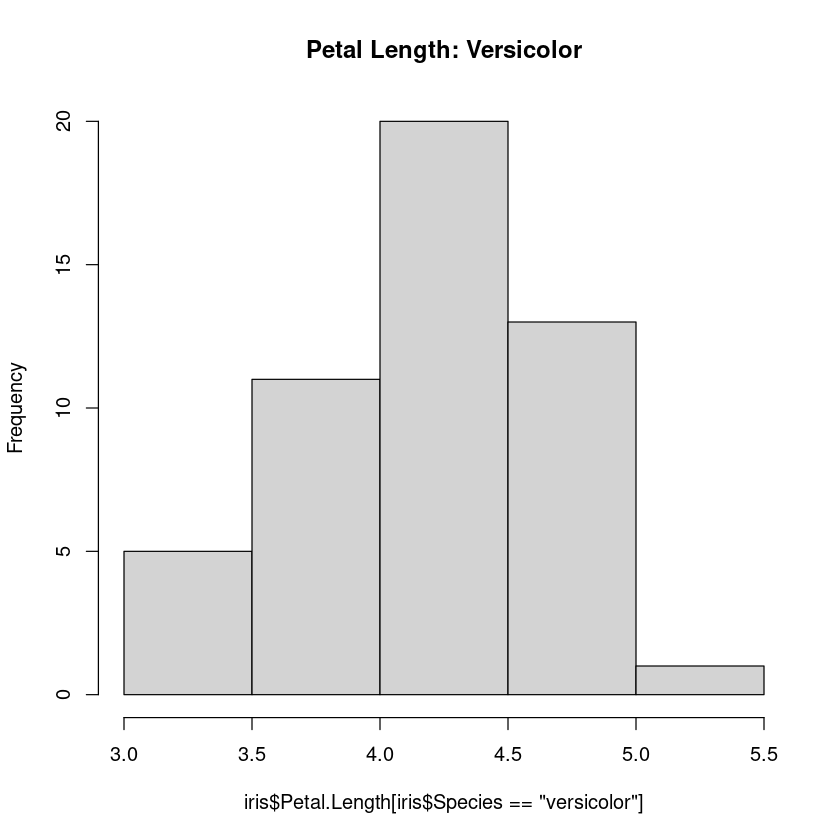

In [7]:
# Select by category: `versicolor`.
hist(iris$Petal.Length[iris$Species == "versicolor"],
     main = "Petal Length: Versicolor")

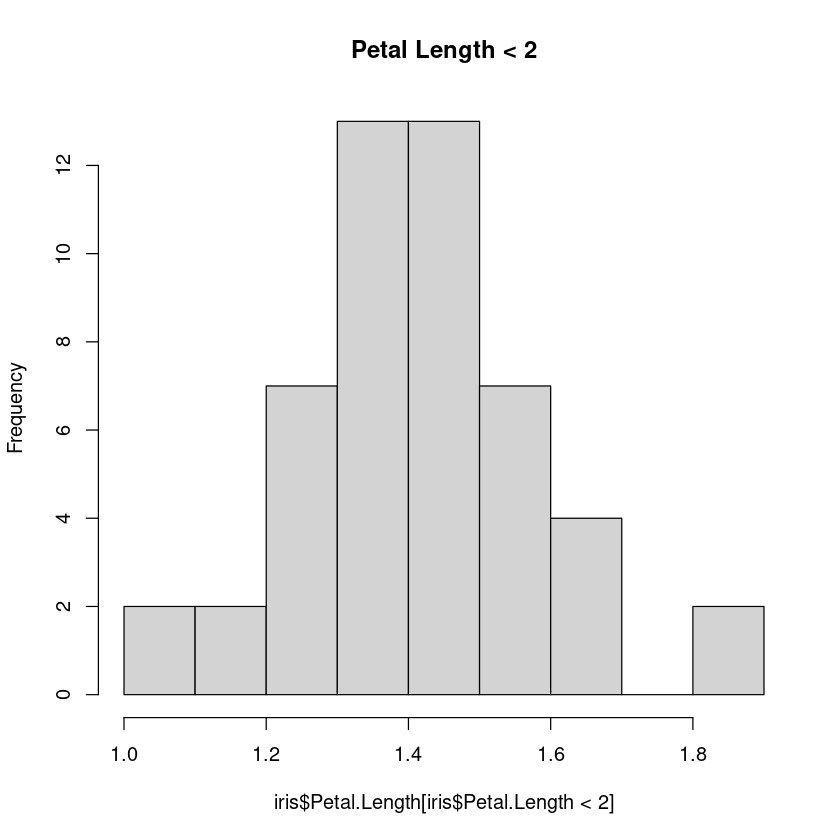

In [8]:
# Select by value: short petals only
hist(iris$Petal.Length[iris$Petal.Length < 2],
     main = "Petal Length < 2")

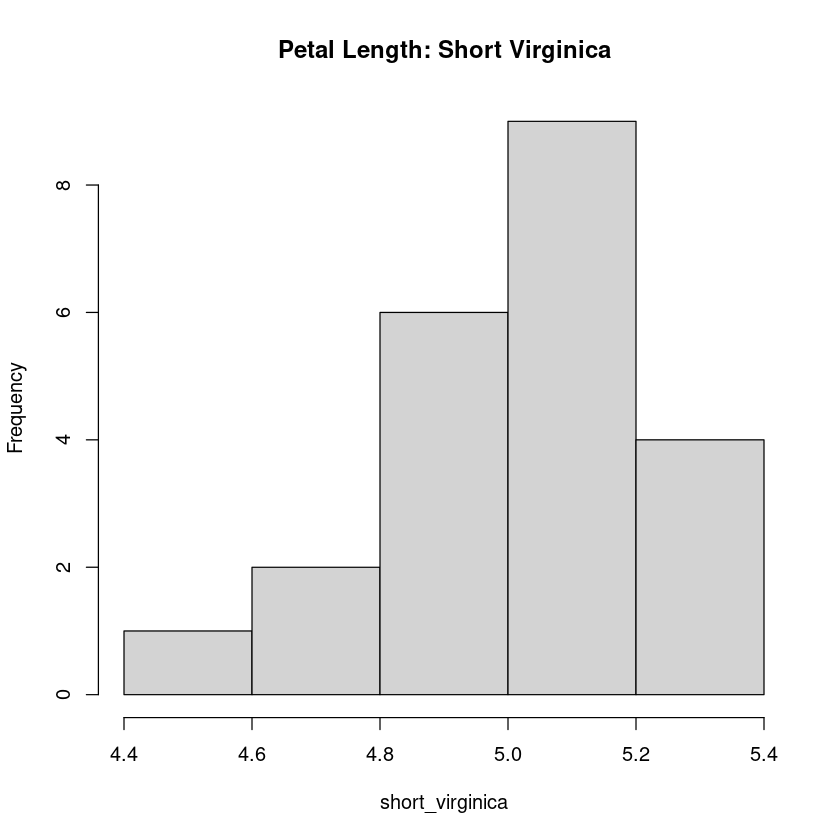

In [9]:
# Multiple selectors.
short_virginica <- iris$Petal.Length[
  iris$Species == "virginica" & 
  iris$Petal.Length < 5.5]

# Short Virginica petals only.
hist(short_virginica, main = "Petal Length: Short Virginica")

  Sepal.Length    Sepal.Width     Petal.Length    Petal.Width   
 Min.   :4.300   Min.   :2.300   Min.   :1.000   Min.   :0.100  
 1st Qu.:4.800   1st Qu.:3.200   1st Qu.:1.400   1st Qu.:0.200  
 Median :5.000   Median :3.400   Median :1.500   Median :0.200  
 Mean   :5.006   Mean   :3.428   Mean   :1.462   Mean   :0.246  
 3rd Qu.:5.200   3rd Qu.:3.675   3rd Qu.:1.575   3rd Qu.:0.300  
 Max.   :5.800   Max.   :4.400   Max.   :1.900   Max.   :0.600  
       Species  
 setosa    :50  
 versicolor: 0  
 virginica : 0  
                
                
                

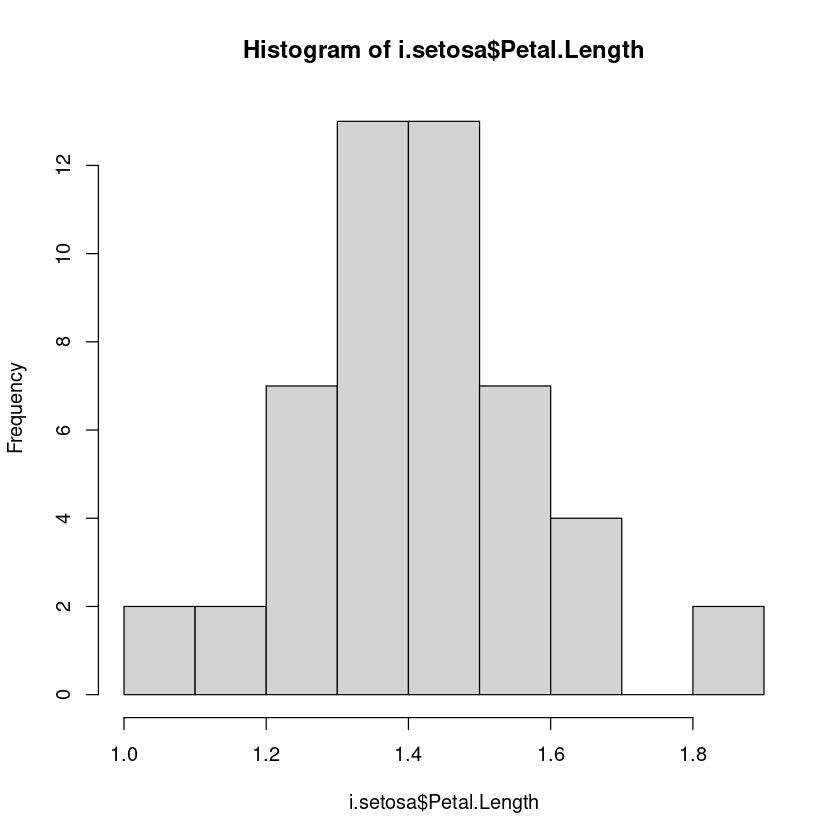

In [10]:
# Above we saw how to select a sub-set of data. Actually this can
# be extended with syntax `data[rows, columns]` for selecting any
# sub-set. Leave rows or columns blank to select all.
i.setosa <- iris[iris$Species == "setosa",]
summary(i.setosa)
hist(i.setosa$Petal.Length)

## Data types and structures

In [11]:
# The basic and default numeric type in R is double precision. This
# is true even then the number is declared without a decimal. The
# next two examples illustrate this.
n1 <- 15
typeof(n1)
n2 <- 1.5
typeof(n2)

[1] "double"

[1] "double"

In [12]:
# In R there are no strings: every piece of text is a character and
# must be declared with double quotes.
c1 <- "c"
typeof(c1)
c2 <- "a string of text"
typeof(c2)

[1] "character"

[1] "character"

In [13]:
# Booleans are provided by the logical type. Notice that R
# allows for abbreviated forms such as `T` is the same as
# `TRUE` and `F` is valid for `FALSE`.
l1 <- TRUE
typeof(l1)
l2 <- F
typeof(l2)

[1] "logical"

[1] "logical"

In [14]:
# The basic data structure in R is the vector. It consists of a one
# dimensional array of elements of the same type. Vectors are built
# with `c()` standard function. R uses 1-based indexing.
v1 <- c(1, 2, 3, 4, 5)
is.vector(v1)

[1] TRUE

In [15]:
# Vectors can be of any basic type, as the following illustrates
v2 <- c("a", "b", "c")
is.vector(v2)
v3 <- c(TRUE, TRUE, FALSE, FALSE, TRUE)
is.vector(v3)

[1] TRUE

[1] TRUE

In [16]:
# For 2-dimensional data structures R provides the matrix. It can
# be constructed with `matrix()` and supports reshaping of vectors
# for construction. All rows and columns have a specified fixed
# number of elements.
m1 <- matrix(c(T, T, F, F, T, F), nrow = 2)
m2 <- matrix(c("a", "b", "c", "d"),  nrow = 2, byrow = T)
m3 <- matrix(c("a", "b", "c", "d"),  nrow = 2, byrow = F)

In [17]:
# Higher dimensional structures are declared as `arrays`. These are
# composed by structures with many tables with dimensions provided
# as a second element in form of `c(rows, columns, tables)`.
a1 <- array(c(1:24), c(4, 3, 2))
is.array(a1)

[1] TRUE

In [18]:
# For Data Science purposes we are often dealing with tables of
# mixed types of columns. For that we have the data frame. 
vNumeric   <- c(1, 2, 3)
vCharacter <- c("a", "b", "c")
vLogical   <- c(T, F, T)

In [19]:
# If we combine vectors of same length and combine then in columnar
# format with `cbind` instead of producing a matrix of mixed types,
# the method coerces all values to a common type. Columns can be
# accessed through the names of original vectors.
dfa <- cbind(vNumeric, vCharacter, vLogical)
dfa

vNumeric,vCharacter,vLogical
1,a,TRUE
2,b,FALSE
3,c,TRUE


In [20]:
# With method `as.data.frame` that is converted into a data frame,
# which supports different types of data as expected.
df <- as.data.frame(cbind(vNumeric, vCharacter, vLogical))
df

vNumeric,vCharacter,vLogical
<chr>,<chr>,<chr>
1,a,TRUE
2,b,FALSE
3,c,TRUE


In [21]:
# Finally there are lists, similar to vectors but supporting data
# of different types along the same axis and sub-lists with any
# format (lists within lists).
o1 <- c(1, 2, 3)
o2 <- c("a", "b", "c", "d")
o3 <- c(T, F, T, T, F)

In [22]:
# Concatenate vectors in single list preserving types.
list1 <- list(o1, o2, o3)
list1

[[1]]
[1] 1 2 3

[[2]]
[1] "a" "b" "c" "d"

[[3]]
[1]  TRUE FALSE  TRUE  TRUE FALSE

In [23]:
# Place a list inside another.
list2 <- list(o1, o2, o3, list1)
list2

[[1]]
[1] 1 2 3

[[2]]
[1] "a" "b" "c" "d"

[[3]]
[1]  TRUE FALSE  TRUE  TRUE FALSE

[[4]]
[[4]][[1]]
[1] 1 2 3

[[4]][[2]]
[1] "a" "b" "c" "d"

[[4]][[3]]
[1]  TRUE FALSE  TRUE  TRUE FALSE

## Type conversion

In [24]:
# Goes to "least restrictive" data type. Parenthesis around the
# command produce verbose output.
(coerce1 <- c(1, "b", TRUE))
typeof(coerce1)

[1] "1"    "b"    "TRUE"

[1] "character"

In [25]:
# Default floating point values can be coerced to integers with
# explicit function `as.integer()`.
(coerce2 <- 5)
typeof(coerce2)
(coerce3 <- as.integer(5))
typeof(coerce3)

[1] 5

[1] "double"

[1] 5

[1] "integer"

In [26]:
# Compatible characters (and structures) can be coerced to numeric.
(coerce4 <- c("1", "2", "3"))
typeof(coerce4)
(coerce5 <- as.numeric(c("1", "2", "3")))
typeof(coerce5)

[1] "1" "2" "3"

[1] "character"

[1] 1 2 3

[1] "double"

In [27]:
# A matrix can be coerced to data frame
(coerce6 <- matrix(1:9, nrow = 3))
is.matrix(coerce6)
(coerce7 <- as.data.frame(matrix(1:9, nrow = 3)))
is.data.frame(coerce7)

1,4,7
2,5,8
3,6,9


[1] TRUE

V1,V2,V3
<int>,<int>,<int>
1,4,7
2,5,8
3,6,9


[1] TRUE

## Data creation

In [28]:
# Generate a range of values (inclusive).
(x1 <- 1:3)
(y  <- 1:9)

[1] 1 2 3

[1] 1 2 3 4 5 6 7 8 9

In [29]:
# Combine variables as data frame. Notice here that x1 has
# only 3 elements and is repeated along the axis. For this
# to work the lengths need to be multiples.
(df1 <- cbind.data.frame(x1, y))
typeof(df1$x1)
str(df1)

x1,y
<int>,<int>
1,1
2,2
3,3
1,4
2,5
3,6
1,7
2,8
3,9


[1] "integer"

'data.frame':	9 obs. of  2 variables:
 $ x1: int  1 2 3 1 2 3 1 2 3
 $ y : int  1 2 3 4 5 6 7 8 9


In [30]:
# Factors allow for more memory-efficient allocation of any
# type of categorical data. Inspect the outputs of the call
# of `str()` here compared to the previous `df1`.
(x2  <- as.factor(c(1:3)))
(df2 <- cbind.data.frame(x2, y))
typeof(df2$x2)
str(df2)

[1] 1 2 3
Levels: 1 2 3

x2,y
<fct>,<int>
1,1
2,2
3,3
1,4
2,5
3,6
1,7
2,8
3,9


[1] "integer"

'data.frame':	9 obs. of  2 variables:
 $ x2: Factor w/ 3 levels "1","2","3": 1 2 3 1 2 3 1 2 3
 $ y : int  1 2 3 4 5 6 7 8 9


In [31]:
# Even after creation of a data frame a column can be coerced
# into a factor (although that is a bit verbose).
x3  <- c(1:3)
df3 <- cbind.data.frame(x3, y)
(df3$x3 <- factor(df3$x3, levels = c(1, 2, 3)))
typeof(df3$x3)
str(df3)

[1] 1 2 3 1 2 3 1 2 3
Levels: 1 2 3

[1] "integer"

'data.frame':	9 obs. of  2 variables:
 $ x3: Factor w/ 3 levels "1","2","3": 1 2 3 1 2 3 1 2 3
 $ y : int  1 2 3 4 5 6 7 8 9


In [32]:
# If a factor (category) is not numerical, it is interesting
# to provide labels for better readability. Since the values
# are integers, for large datasets that is a huge RAM saving.
x4  <- c(1:3)
df4 <- cbind.data.frame(x4, y)
df4$x4 <- factor(df4$x4,
                 levels = c(1, 2, 3),
                 labels = c("macOS", "Windows", "Linux"))
df4
typeof(df4$x4)
str(df4)

x4,y
<fct>,<int>
macOS,1
Windows,2
Linux,3
macOS,4
Windows,5
Linux,6
macOS,7
Windows,8
Linux,9


[1] "integer"

'data.frame':	9 obs. of  2 variables:
 $ x4: Factor w/ 3 levels "macOS","Windows",..: 1 2 3 1 2 3 1 2 3
 $ y : int  1 2 3 4 5 6 7 8 9


In [33]:
# Factors can be ordered (disregarding the numerical values)
# for allowing comparison (selection, as follows).
x5  <- c(1:3)
df5 <- cbind.data.frame(x5, y)
(df5$x5 <- ordered(df5$x5,
                   levels = c(3, 1, 2),
                   labels = c("No", "Maybe", "Yes")))
df5
typeof(df5$x5)
str(df5)

[1] Maybe Yes   No    Maybe Yes   No    Maybe Yes   No   
Levels: No < Maybe < Yes

x5,y
<ord>,<int>
Maybe,1
Yes,2
No,3
Maybe,4
Yes,5
No,6
Maybe,7
Yes,8
No,9


[1] "integer"

'data.frame':	9 obs. of  2 variables:
 $ x5: Ord.factor w/ 3 levels "No"<"Maybe"<"Yes": 2 3 1 2 3 1 2 3 1
 $ y : int  1 2 3 4 5 6 7 8 9


In [34]:
# ...and that allows for this sort of selection:
df5[df5$x5 > "No", ]

,x5,y
,<ord>,<int>
1,Maybe,1
2,Yes,2
4,Maybe,4
5,Yes,5
7,Maybe,7
8,Yes,8


In [35]:
# It has already been used throughout this tutorial but not
# introduced formally: the colon operator. Assigns number 0
# through 10 to x1
(x1 <- 0:10)

# ... it can also be used in descending order
(x2 <- 10:0)

[1]  0  1  2  3  4  5  6  7  8  9 10

[1] 10  9  8  7  6  5  4  3  2  1  0

In [36]:
# For more generic sequence allocation: `seq()`.
(x3 <- seq(10))

# ...it can also specify steps with `by` keyword.
(x4 <- seq(15, -15, by = -3))

# User input can be prompted with `scan()`.
(x6 <- scan())

[1]  1  2  3  4  5  6  7  8  9 10

[1]  15  12   9   6   3   0  -3  -6  -9 -12 -15

numeric(0)

In [37]:
# Fixed value arrays can be generated with `rep()`.
(x7 <- rep(TRUE, 5))

# ...which also works on sets...
(x8 <- rep(c(TRUE, FALSE), 5))

# ...or individual items in set.
(x9 <- rep(c(TRUE, FALSE), each = 5))

[1] TRUE TRUE TRUE TRUE TRUE

[1]  TRUE FALSE  TRUE FALSE  TRUE FALSE  TRUE FALSE  TRUE FALSE

[1]  TRUE  TRUE  TRUE  TRUE  TRUE FALSE FALSE FALSE FALSE FALSE

## Loading data

In [38]:
# Use pacman to load add-on packages as desired.
pacman::p_load(pacman, rio, data.table) 

In [39]:
# From the official R documentation: avoid Excel files!
browseURL("http://j.mp/2aFZUrJ", browser = 'Firefox')

In [40]:
# rio imports CSV, TXT, XLSX:
head(rio_csv <- import("data/r-samples/mbb.csv"))
head(rio_txt <- import("data/r-samples/mbb.txt"))
head(rio_xls <- import("data/r-samples/mbb.xlsx"))

,Month,Mozart,Beethoven,Bach
,<chr>,<int>,<int>,<int>
1,2004-01,12,8,15
2,2004-02,12,9,15
3,2004-03,12,9,14
4,2004-04,12,8,14
5,2004-05,11,9,13
6,2004-06,9,7,12


,Month,Mozart,Beethoven,Bach
,<chr>,<int>,<int>,<int>
1,2004-01,12,8,15
2,2004-02,12,9,15
3,2004-03,12,9,14
4,2004-04,12,8,14
5,2004-05,11,9,13
6,2004-06,9,7,12


,Month,Mozart,Beethoven,Bach
,<chr>,<dbl>,<dbl>,<dbl>
1,2004-01,12,8,15
2,2004-02,12,9,15
3,2004-03,12,9,14
4,2004-04,12,8,14
5,2004-05,11,9,13
6,2004-06,9,7,12


In [41]:
# R's built-in function for text files (used by rio) is
# `read.table()`. Load a spreadsheet that has been saved
# as tab-delimited text file. This command gives an error
# on missing data but works on complete data. Un-comment:
# r_txt1 <- read.table("../data/mbb.txt", header = TRUE)

In [42]:
# This works with missing data by specifying the separator: 
# \t is for tabs, sep = "," for commas.
r_txt2 <- read.table("data/r-samples/mbb.txt", header = TRUE, sep = "\t")

In [43]:
# R's built-in function for csv files (also used by rio). No need to
# specify delimiters for missing data because CSV implies comma.
trends.csv <- read.csv("data/r-samples/mbb.csv", header = TRUE)

In [44]:
# A very efficient function for large files is provided by the
# package data.table `fread()`. This is faster than built-in:
trends.csv2 <- fread("data/r-samples/mbb.csv", header = TRUE, sep = ",")

In [45]:
# Clean all...
rm(list = ls()) 